Reference:

- https://github.com/JuliaReach/LazySets.jl/issues/2346

In [1]:
using LazySets, Plots

┌ Info: Precompiling LazySets [b4f0291d-fe17-52bc-9479-3d1a343d9043]
└ @ Base loading.jl:1278


In [3]:
board = VPolygon([0.0 1.0 1.0 0.0
                  0.0 0.0 1.0 1.0])

shape₁ = VPolygon([0.2 0.5 0.7
                   0.2 0.9 0.1]);

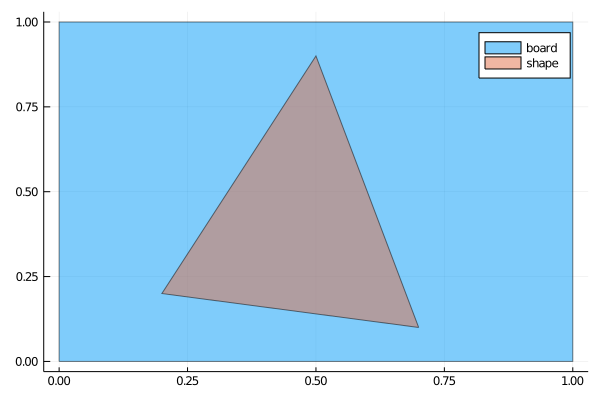

In [4]:
plot(board, lab="board")

plot!(shape₁, lab="shape")

In [57]:
B = overapproximate(board, Hyperrectangle)

order = 100
A = split(overapproximate(shape₁, Hyperrectangle), [order, order])
A = filter(x -> !isdisjoint(x, shape₁), A)

# TODO automate union of unions
D = [difference(B, Ai) for Ai in A]
D = reduce(vcat, [Di.array for Di in D]) |> UnionSetArray
D = filter(x -> isdisjoint(x, shape₁), D.array) |> UnionSetArray

# TODO fix plotting of SArray hyperrectangles
result = [Hyperrectangle(Vector(Hi.center), Vector(Hi.radius)) for Hi in D.array];

In [59]:
length(result)

197

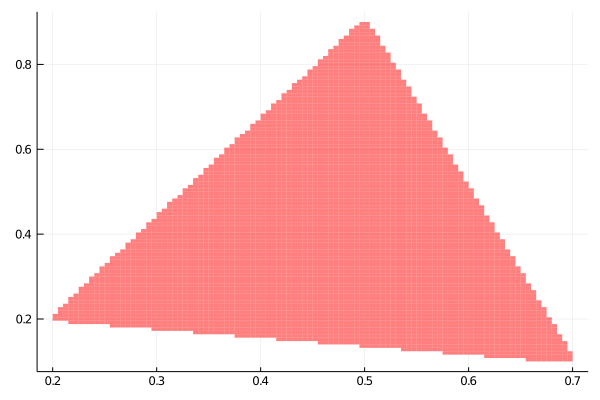

In [64]:
plot(A, lw=0.0, color=:red, format=:png)

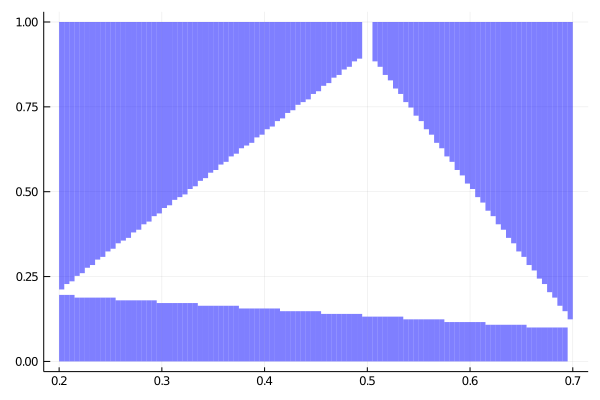

In [63]:
plot(result, lw=0.0, color=:blue, format=:png)